In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datafile = 'data/ex1data1.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1),unpack=True)

X= np.transpose(np.array(cols[:-1]))
y= np.transpose(np.array(cols[-1:]))
m = y.size 
print m
X=np.insert(X,0,int(1),axis=1)
print X.shape[1]





97
2


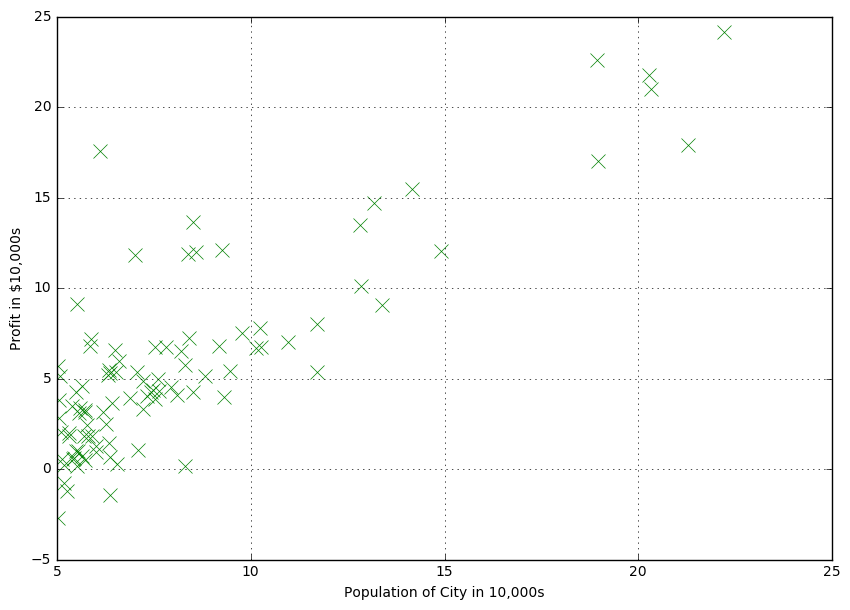

In [3]:
plt.figure(figsize=(10,7))
plt.plot(X[:,1],y[:,0],'gx',markersize=10)
plt.grid(True)
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [4]:
#cost function
iterations=1500
alpha=0.01

def h(theta,X):
    return np.dot(X,theta)

def computecost (mytheta,X,y):
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

initial_theta = np.zeros((X.shape[1],1))
computecost (initial_theta,X,y)


32.07273387745567

In [5]:
#gradient descent

def descendGradient(X, theta_start=np.zeros(2) ):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in xrange(iterations):
        tmptheta = theta
        jvec.append(computecost(theta,X,y))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in xrange(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

[[-3.63606348]
 [ 1.16698916]]


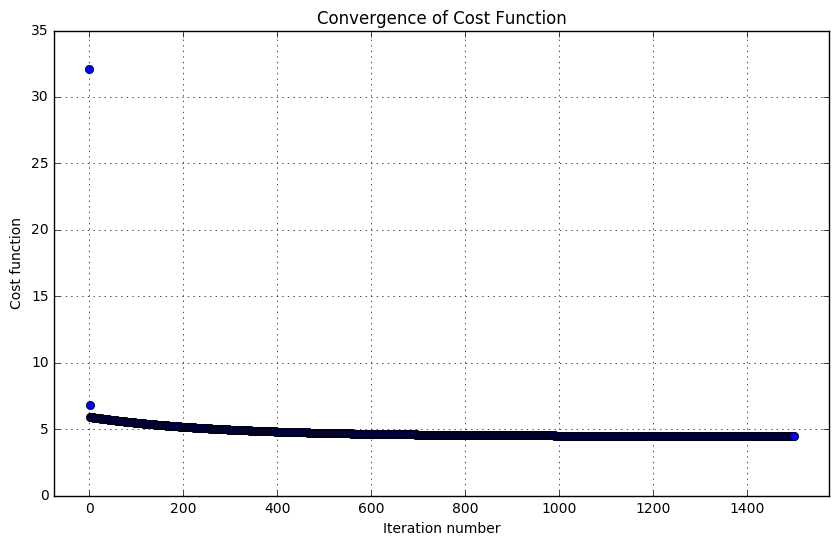

In [6]:
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)
print theta


def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(iterations),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dum = plt.xlim([-0.05*iterations,1.05*iterations])
    


plotConvergence(jvec)

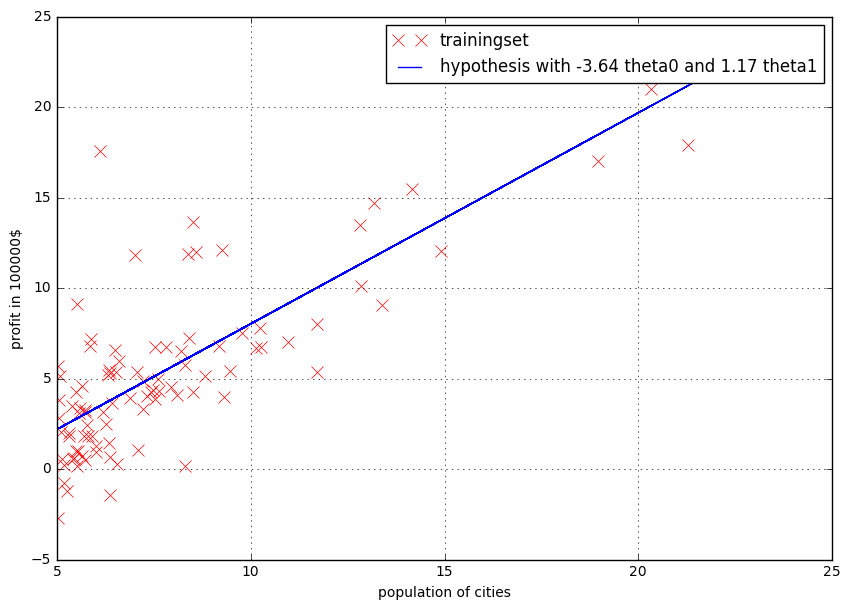

In [7]:
#Plot the line on top of the data to ensure it looks correct
def myfit(xval):
    return theta[0] + theta[1]*xval
plt.figure(figsize=(10,7))
plt.plot(X[:,1],y[:,0],'rx',markersize=8,label='trainingset')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label='hypothesis with %.2f theta0 and %.2f theta1'%(theta[0],theta[1]))
plt.xlabel("population of cities")
plt.ylabel("profit in 100000$")
plt.grid(True) 
plt.legend()

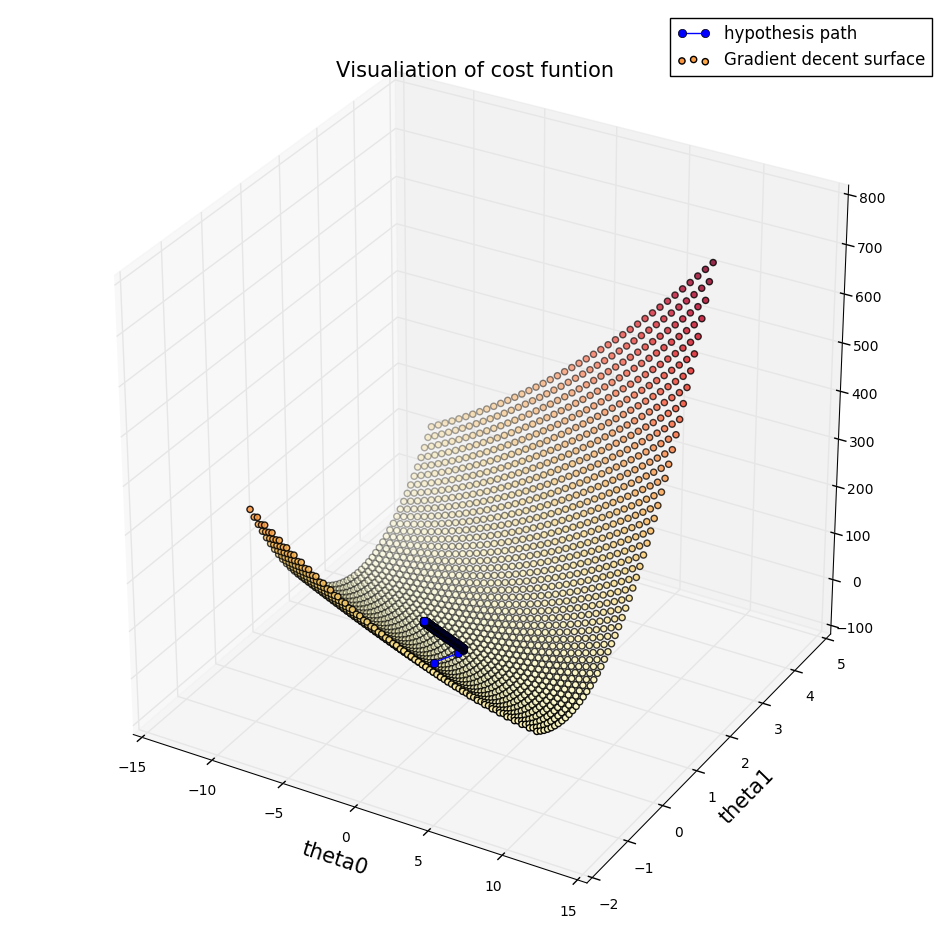

In [8]:
# Visualization of Cost function
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

xvals=np.arange(-10,10,0.5)
yvals=np.arange(-1,4,0.1)

myxs, myys, myzs = [], [], []

for dlx in xvals:
    for dly in yvals:
        myxs.append(dlx)
        myys.append(dly)
        myzs.append(computecost(np.array([[dlx], [dly]]),X,y))


        
scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd'),label='Gradient decent surface')


plt.xlabel('theta0',fontsize=15)
plt.ylabel('theta1',fontsize=15)

plt.title("Visualiation of cost funtion",fontsize=15)

plt.plot([x[0] for x in thetahistory],[x[1] for x in thetahistory],jvec,'bo-',label='hypothesis path')
plt.legend()



In [9]:
#multiple variable linear regression
datafile= 'data/ex1data2.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
np.shape(cols)
X=np.transpose(cols[:-1])
y=np.transpose(cols[-1:])
m=np.shape(y)[0]
X=np.insert(X,0,1,axis=1)
np.shape(X)

(47, 3)

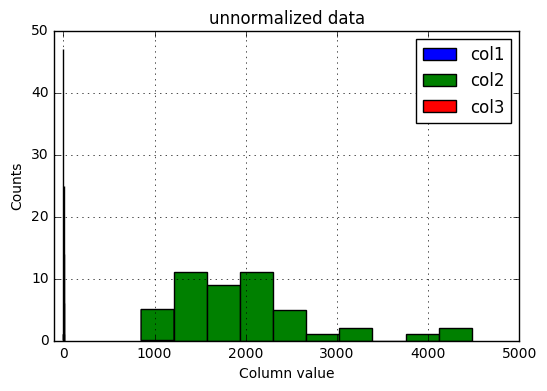

In [10]:
#Normalize data
plt.grid(True)
plt.xlim([-100,5000])
du=plt.hist(X[:,0],label="col1")
du=plt.hist(X[:,1],label="col2")
du=plt.hist(X[:,2],label="col3")

plt.title("unnormalized data")
plt.xlabel('Column value')
plt.ylabel('Counts')
du=plt.legend()

In [11]:
#Normalize your data

Xnorm=X.copy()
stored_feature_means, stored_feature_stds = [], []
print np.shape(Xnorm)
for icol in xrange (Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    if not icol:continue
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]
    

(47, 3)


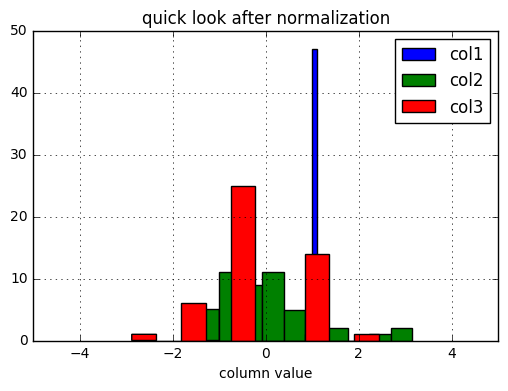

In [12]:
#fast look after normalization

plt.grid(True)
plt.xlim([-5,5])
du=plt.hist(Xnorm[:,0],label="col1")
du=plt.hist(Xnorm[:,1],label="col2")
du=plt.hist(Xnorm[:,2],label="col3")
plt.xlabel("column value")

plt.title("quick look after normalization")
du=plt.legend()



[[ 340412.56301439]
 [ 109371.67272252]
 [  -6502.3992545 ]]


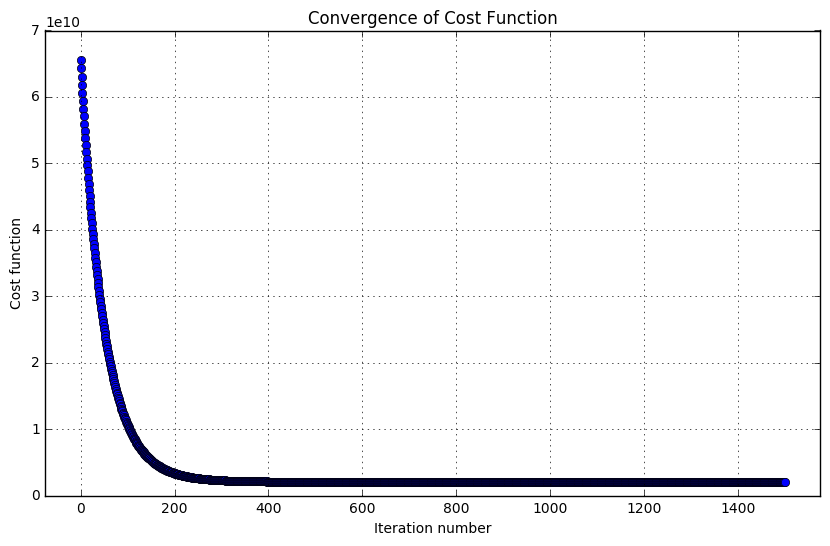

In [13]:
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec2= descendGradient(Xnorm,initial_theta)
print theta
plotConvergence(jvec2)





In [18]:
print "Check of result: What is price of house with 1650 square feet and 3 bedrooms?"
ytest = np.array([1650.,3.])
#To "undo" feature normalization, we "undo" 1650 and 3, then plug it into our hypothesis
ytestscaled = [(ytest[x]-stored_feature_means[x+1])/stored_feature_stds[x+1] for x in xrange(len(ytest))]
ytestscaled.insert(0,1)
print ytestscaled
print "$%0.7f" % float(h(theta,ytestscaled))

Check of result: What is price of house with 1650 square feet and 3 bedrooms?
[1, -0.44604386032761639, -0.2260933675776883]
$293098.1492475
